In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
data=pd.read_csv('/content/homeprices_banglore.csv')
data.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [21]:
from sklearn import preprocessing
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(data.drop('price',axis='columns'))
scaled_y = sy.fit_transform(data['price'].values.reshape(data.shape[0],1))

scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [23]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [24]:
import random
random.randint(0,6)

1

In [25]:
def stocastic_gradient_descent(x,y_true,epochs,learning_rate=0.01):
  number_featurs=x.shape[1]
  w=np.ones(shape=(number_featurs))
  b=0
  total_samples=x.shape[0]
  epochs_list=[]
  cost_list=[]
  for i in range(epochs):
     random_index = random.randint(0,total_samples-1)
     sample_x=x[random_index]
     sample_y=y_true[random_index]
     y_prd=np.dot(sample_x,w)+b
     w_grad=(-2/total_samples)*(sample_x.T.dot(sample_y-y_prd))
     d_grad=(-2/total_samples)*(sample_y-y_prd)
     w=w-learning_rate*w_grad
     b=b-learning_rate*d_grad
     cost=np.mean(np.square(y_true-y_prd))
     if i%100==0:
      epochs_list.append(i)
      cost_list.append(cost)
  return w,b,epochs_list,cost_list



In [26]:
w,b,epochs_list,cost_list=stocastic_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),10000)

In [27]:
w,b

(array([0.70764034, 0.67396409]), np.float64(-0.23490129118233613))

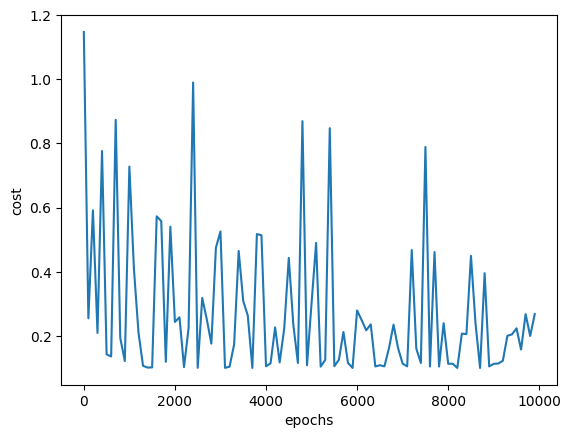

In [28]:
plt.xlabel('epochs')
plt.ylabel('cost')
plt.plot(epochs_list,cost_list)

In [29]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b

    return sy.inverse_transform([[scaled_price]])[0][0]


In [30]:

predict(2600,3,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(105.07628241712145)

In [32]:
predict(1000,2,w,b)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


np.float64(29.622989451112847)